# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import itertools
# import libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
sns.set_style("darkgrid")
df=pd.read_csv("foodhub_order.csv")
df

,decorder_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


### Understanding the structure of the data

### **Question 5:** How many orders are not rated? (0.5 mark)

In [3]:
df.loc[0:,['cuisine_type']].value_counts()
## 736 items arnot rated.

cuisine_type  
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
dtype: int64

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [4]:
 df.shape

(1898, 9)

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [5]:
### There are 1898 rows and nine colums in this data set.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [6]:
#for col in['restaurant_name','cuisine_type','day_of_the_week']:
    #df[col] = df[col].astype('category')
#print(df[col])

cols=['restaurant_name','cuisine_type','day_of_the_week']
df[cols] = df[cols].astype('category')
df[cols]

,restaurant_name,cuisine_type,day_of_the_week
0,Hangawi,Korean,Weekend
1,Blue Ribbon Sushi Izakaya,Japanese,Weekend
2,Cafe Habana,Mexican,Weekday
3,Blue Ribbon Fried Chicken,American,Weekend
4,Dirty Bird to Go,American,Weekday
...,...,...,...
1893,Chipotle Mexican Grill $1.99 Delivery,Mexican,Weekend
1894,The Smile,American,Weekend
1895,Blue Ribbon Sushi,Japanese,Weekday
1896,Jack's Wife Freda,Mediterranean,Weekday


# #Question 4: Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [7]:
df.describe()

,decorder_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

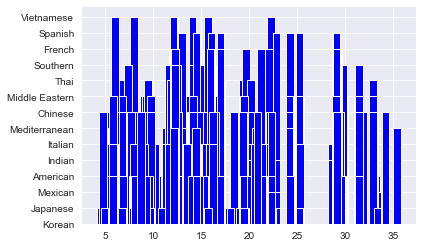

In [8]:
## compairing cuisine and cost 

cuisine_name=df["cuisine_type"]
cost_name=df["cost_of_the_order"]
#profit_name= df["delivery_time"]

plt.bar(cost_name,cuisine_name,color="blue")
#plt.bar(market_name,profit_name, color="red")
plt.show()

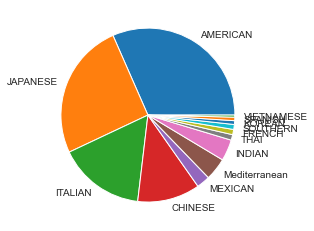

In [9]:
American_DATA=df['cuisine_type'].value_counts().American
Japanese_DATA=df['cuisine_type'].value_counts().Japanese
Italian_DATA=df['cuisine_type'].value_counts().Italian
Chinese_DATA=df['cuisine_type'].value_counts().Chinese
Mexican_DATA=df['cuisine_type'].value_counts().Mexican
Indian_DATA=df['cuisine_type'].value_counts().Indian
Mediterranean_DATA   =df['cuisine_type'].value_counts().Mediterranean
Thai_DATA=df['cuisine_type'].value_counts().Thai
French_DATA=df['cuisine_type'].value_counts().French
Southern_DATA  =df['cuisine_type'].value_counts().Southern
Korean_DATA=df['cuisine_type'].value_counts().Korean
SpanisH_DATA =df['cuisine_type'].value_counts().Spanish
Vietnamese_DATA =df['cuisine_type'].value_counts().Vietnamese
#Middle Eastern_DATA=df['cuisine_type'].value_counts().Middle Eastern

#print(Japanese_DATA)
y = [American_DATA,Japanese_DATA,Italian_DATA,Chinese_DATA,Mediterranean_DATA,Mexican_DATA,Indian_DATA,Thai_DATA,French_DATA,Southern_DATA,Korean_DATA,SpanisH_DATA,Vietnamese_DATA]

ylabels = ["AMERICAN", "JAPANESE","ITALIAN","CHINESE","MEXICAN","Mediterranean","INDIAN","THAI","FRENCH","SOUTHERN","KOREAN","SPANISH","VIETNAMESE"]

plt.pie(y, labels = ylabels, startangle = 1080)
plt.show() 



      

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [53]:
result=df.groupby(['restaurant_name','cost_of_the_order']).sum().sort_values(["restaurant_name","cost_of_the_order"],ascending=False)
result.head(5)
#result=df.loc[0:,['cost_of_the_order','restaurant_name']].value_counts(),ass
#result.head(5)

decorder_id  customer_id  \
restaurant_name cost_of_the_order                             
indikitch       35.41                        0            0   
                34.19                        0            0   
                33.37                        0            0   
                33.32                        0            0   
                33.22                        0            0   

                                   food_preparation_time  delivery_time  \
restaurant_name cost_of_the_order                                         
indikitch       35.41                                  0              0   
                34.19                                  0              0   
                33.37                                  0              0   
                33.32                                  0              0   
                33.22                                  0              0   

                                   customer id  
restaurant_name cost_of_the_order               
indikitch       35.41                        0  
                34.19                        0  
                33.37                        0  
                33.32                        0  
                33.22                        0

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [11]:
#result=df.groupby(['cost_of_the_order','restaurant_name']).sum().sort_values(["cost_of_the_order","restaurant_name"],ascending=False)
#result.head(5)

cost=df.loc[0:,['cuisine_type','day_of_the_week']].value_counts()
cost

cuisine_type    day_of_the_week
American        Weekend            415
Japanese        Weekend            335
Italian         Weekend            207
American        Weekday            169
Chinese         Weekend            163
Japanese        Weekday            135
Italian         Weekday             91
Mexican         Weekend             53
Chinese         Weekday             52
Indian          Weekend             49
Middle Eastern  Weekend             32
Mediterranean   Weekend             32
Mexican         Weekday             24
Indian          Weekday             24
Middle Eastern  Weekday             17
Thai            Weekend             15
Mediterranean   Weekday             14
French          Weekend             13
Korean          Weekend             11
Southern        Weekend             11
Spanish         Weekend             11
Southern        Weekday              6
French          Weekday              5
Thai            Weekday              4
Vietnamese      Weekend         

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [12]:
df.loc[0:,['cost_of_the_order']].value_counts()

cost_of_the_order
12.18                86
12.13                82
12.23                47
24.20                42
29.10                37
                     ..
13.77                 1
4.66                  1
14.26                 1
14.45                 1
35.41                 1
Length: 312, dtype: int64

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [13]:
total=0
a=df["delivery_time"]
for average_profit in a:
    total=total+average_profit
print(total/(len(df)))

24.161749209694417


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [52]:
#,'restaurant_name','cuisine_type',.sort_values
#result.head(1)

#result=df.groupby(['customer_id',((['cost_of_the_order'])).astype('int'))] 
#esult
#df.loc[0:,['customer_id'],['customer_id']].value_counts()
#result=df.groupby(['order_id','cost_of_the_order','restaurant_name']).sum().sort_values(['order_id','cost_of_the_order','restaurant_name'],ascending=False)
#result.head(1)
#df['customer id'] = df['cost_of_the_order'].apply(lambda x: 1 if (x>3)  else 0)
#df

#result= df.groupby("customer_id").agg(({"cost_of_the_order":['min'],ascending=False}))
#result.head(5)

df[df.cost_of_the_order == df.cost_of_the_order.max()]

,decorder_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,customer id
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29,1


### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)